In [3]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd

# 0. Data Preparation

In [101]:
# Do some basic sanity checks.
stock_dir = 'Stocks'
num_stock_files = len([f for f in os.listdir(stock_dir)])
num_us_stock_files = len([f for f in os.listdir(stock_dir) if f.endswith('us.txt')])
assert num_stock_files == num_us_stock_files

etf_dir = 'ETFs'
num_etf_files = len([f for f in os.listdir(etf_dir)])
num_us_etf_files = len([f for f in os.listdir(etf_dir) if f.endswith('us.txt')])
assert num_etf_files == num_us_etf_files

all_files = os.listdir()

In [104]:
# Build structure to map stocks to a numerical index.
sorted_files = sorted(os.listdir(stock_dir) + os.listdir(etf_dir))
all_symbols = [fname.replace('.us.txt', '') for fname in sorted_files]
sid_to_name = {i: name for i, name in enumerate(sorted(all_symbols))}
name_to_sid = {name: sid for sid, name in sid_to_name.items()}

In [108]:
# Load in all stock pricing data.
price_dfs = []
for fname in sorted_files:
    symbol_name = fname.replace('.us.txt', '')
    print(f'Loading pricing data for {symbol_name}')
    
    fpath = os.path.join(stock_dir, fname)
    if not os.path.isfile(fpath):
        fpath = os.path.join(etf_dir, fname)
        
    is_empty = len(open(fpath).read().strip()) == 0
    
    if is_empty:
        print(f'Pricing data for {symbol_name} is empty')
    else:
        df = pd.read_csv(fpath)
        df.columns = [c.lower() for c in df.columns]
        df['date'] = pd.to_datetime(df['date'])
        df['sid'] = name_to_sid[symbol_name]
        price_dfs.append(df)

Loading pricing data for a
Loading pricing data for aa
Loading pricing data for aaap
Loading pricing data for aaba
Loading pricing data for aac
Loading pricing data for aadr
Loading pricing data for aal
Loading pricing data for aamc
Loading pricing data for aame
Loading pricing data for aan
Loading pricing data for aaoi
Loading pricing data for aaon
Loading pricing data for aap
Loading pricing data for aapl
Loading pricing data for aat
Loading pricing data for aau
Loading pricing data for aav
Loading pricing data for aaww
Loading pricing data for aaxj
Loading pricing data for aaxn
Loading pricing data for ab
Loading pricing data for abac
Loading pricing data for abax
Loading pricing data for abb
Loading pricing data for abbv
Loading pricing data for abc
Loading pricing data for abcb
Loading pricing data for abcd
Loading pricing data for abco
Loading pricing data for abdc
Loading pricing data for abe
Loading pricing data for abeo
Loading pricing data for abeow
Loading pricing data for a

Loading pricing data for all
Loading pricing data for all_a
Loading pricing data for all_b
Loading pricing data for all_c
Loading pricing data for all_d
Loading pricing data for all_e
Loading pricing data for all_f
Loading pricing data for alle
Loading pricing data for allt
Loading pricing data for ally
Loading pricing data for ally_a
Loading pricing data for aln
Loading pricing data for alna
Loading pricing data for alny
Loading pricing data for alo
Loading pricing data for alog
Loading pricing data for alot
Loading pricing data for alp_o-cl
Loading pricing data for alp_q
Loading pricing data for alpn
Loading pricing data for alqa
Loading pricing data for alrm
Loading pricing data for alrn
Loading pricing data for alsk
Loading pricing data for alsn
Loading pricing data for alt
Loading pricing data for altr
Loading pricing data for alts
Loading pricing data for alty
Loading pricing data for alv
Loading pricing data for alx
Loading pricing data for alxn
Loading pricing data for am
Loadi

Loading pricing data for atri
Loading pricing data for atro
Loading pricing data for atrs
Loading pricing data for atsg
Loading pricing data for atto
Loading pricing data for attu
Loading pricing data for atu
Loading pricing data for atus
Loading pricing data for atv
Loading pricing data for atvi
Loading pricing data for atxi
Loading pricing data for au
Loading pricing data for aubn
Loading pricing data for audc
Loading pricing data for aug
Loading pricing data for aumn
Loading pricing data for auo
Loading pricing data for auph
Loading pricing data for ause
Loading pricing data for auto
Loading pricing data for auy
Loading pricing data for ava
Loading pricing data for aval
Loading pricing data for avav
Loading pricing data for avb
Loading pricing data for avd
Loading pricing data for avdl
Loading pricing data for aveo
Loading pricing data for avgo
Loading pricing data for avgr
Loading pricing data for avh
Loading pricing data for avhi
Loading pricing data for avid
Loading pricing data 

Loading pricing data for bke
Loading pricing data for bkep
Loading pricing data for bkepp
Loading pricing data for bkf
Loading pricing data for bkh
Loading pricing data for bkhu
Loading pricing data for bki
Loading pricing data for bkj
Loading pricing data for bkk
Loading pricing data for bkln
Loading pricing data for bkmu
Loading pricing data for bkn
Loading pricing data for bks
Loading pricing data for bksc
Loading pricing data for bkt
Loading pricing data for bku
Loading pricing data for bkyi
Loading pricing data for bl
Loading pricing data for blbd
Loading pricing data for blcm
Loading pricing data for bld
Loading pricing data for bldp
Loading pricing data for bldr
Loading pricing data for ble
Loading pricing data for bles
Loading pricing data for blfs
Loading pricing data for blh
Loading pricing data for blhy
Loading pricing data for blin
Loading pricing data for blj
Loading pricing data for blk
Loading pricing data for blkb
Loading pricing data for bll
Loading pricing data for bl

Loading pricing data for camp
Loading pricing data for camt
Loading pricing data for cane
Loading pricing data for canf
Loading pricing data for cape
Loading pricing data for capl
Loading pricing data for capr
Loading pricing data for car
Loading pricing data for cara
Loading pricing data for carb
Loading pricing data for carg
Loading pricing data for caro
Loading pricing data for cars
Loading pricing data for cart
Loading pricing data for carv
Loading pricing data for carz
Loading pricing data for casc
Loading pricing data for cash
Loading pricing data for casi
Loading pricing data for casm
Loading pricing data for cass
Loading pricing data for casy
Loading pricing data for cat
Loading pricing data for catb
Loading pricing data for catc
Loading pricing data for cath
Loading pricing data for catm
Loading pricing data for cato
Loading pricing data for cats
Loading pricing data for caty
Loading pricing data for catyw
Loading pricing data for cavm
Loading pricing data for caw
Loading pric

Loading pricing data for clct
Loading pricing data for cld
Loading pricing data for cldc
Loading pricing data for cldr
Loading pricing data for cldt
Loading pricing data for cldx
Loading pricing data for clf
Loading pricing data for clfd
Loading pricing data for clgx
Loading pricing data for clh
Loading pricing data for cli
Loading pricing data for clir
Loading pricing data for clirw
Loading pricing data for clls
Loading pricing data for clm
Loading pricing data for clmt
Loading pricing data for clne
Loading pricing data for clns
Loading pricing data for clns_b
Loading pricing data for clns_c-cl
Loading pricing data for clns_d
Loading pricing data for clns_e
Loading pricing data for clns_g
Loading pricing data for clns_h
Loading pricing data for clns_i
Loading pricing data for clns_j
Loading pricing data for clnt
Loading pricing data for clpr
Loading pricing data for clr
Loading pricing data for clrb
Loading pricing data for clrbw
Loading pricing data for clrbz
Loading pricing data for

Loading pricing data for cswi
Loading pricing data for csx
Loading pricing data for ctaa
Loading pricing data for ctas
Loading pricing data for ctb
Loading pricing data for ctbb
Loading pricing data for ctbi
Loading pricing data for ctdd
Loading pricing data for ctek
Loading pricing data for ctg
Loading pricing data for cthr
Loading pricing data for ctib
Loading pricing data for ctic
Loading pricing data for ctl
Loading pricing data for ctlt
Loading pricing data for ctmx
Loading pricing data for ctnn
Loading pricing data for cto
Loading pricing data for ctr
Loading pricing data for ctre
Loading pricing data for ctrl
Loading pricing data for ctrn
Loading pricing data for ctrp
Loading pricing data for ctrv
Loading pricing data for cts
Loading pricing data for ctsh
Loading pricing data for ctso
Loading pricing data for ctt
Loading pricing data for ctu
Loading pricing data for ctv
Loading pricing data for ctw
Loading pricing data for ctws
Loading pricing data for ctx
Loading pricing data f

Loading pricing data for din
Loading pricing data for diod
Loading pricing data for dirt
Loading pricing data for dis
Loading pricing data for disca
Loading pricing data for discb
Loading pricing data for disck
Loading pricing data for dish
Loading pricing data for dit
Loading pricing data for div
Loading pricing data for diva
Loading pricing data for divb
Loading pricing data for divo
Loading pricing data for divy
Loading pricing data for djci
Loading pricing data for djco
Loading pricing data for djd
Loading pricing data for djp
Loading pricing data for dk
Loading pricing data for dkl
Loading pricing data for dks
Loading pricing data for dkt
Loading pricing data for dl
Loading pricing data for dla
Loading pricing data for dlb
Loading pricing data for dlbl
Loading pricing data for dlbr
Loading pricing data for dlbs
Loading pricing data for dlhc
Loading pricing data for dln
Loading pricing data for dlng
Loading pricing data for dlng_a
Loading pricing data for dlph
Loading pricing data 

Loading pricing data for edu
Loading pricing data for educ
Loading pricing data for edv
Loading pricing data for edz
Loading pricing data for ee
Loading pricing data for eea
Loading pricing data for eeb
Loading pricing data for eeft
Loading pricing data for eeh
Loading pricing data for eei
Loading pricing data for eelv
Loading pricing data for eem
Loading pricing data for eema
Loading pricing data for eemo
Loading pricing data for eems
Loading pricing data for eemv
Loading pricing data for eemx
Loading pricing data for eep
Loading pricing data for eeq
Loading pricing data for ees
Loading pricing data for eet
Loading pricing data for eev
Loading pricing data for eex
Loading pricing data for efa
Loading pricing data for efad
Loading pricing data for efas
Loading pricing data for efav
Loading pricing data for efax
Loading pricing data for efbi
Loading pricing data for efc
Loading pricing data for eff
Loading pricing data for effe
Loading pricing data for efg
Loading pricing data for efii


Loading pricing data for eumv
Loading pricing data for euo
Loading pricing data for eurl
Loading pricing data for eurn
Loading pricing data for eurz
Loading pricing data for eusa
Loading pricing data for eusc
Loading pricing data for euxl
Loading pricing data for ev
Loading pricing data for eva
Loading pricing data for evar
Loading pricing data for evbg
Loading pricing data for evbn
Loading pricing data for evc
Loading pricing data for evep
Loading pricing data for evf
Loading pricing data for evg
Loading pricing data for evgbc
Loading pricing data for evgn
Loading pricing data for evh
Loading pricing data for evhc
Loading pricing data for evi
Loading pricing data for evix
Loading pricing data for evj
Loading pricing data for evk
Loading pricing data for evlmc
Loading pricing data for evlv
Loading pricing data for evm
Loading pricing data for evn
Loading pricing data for evo
Loading pricing data for evok
Loading pricing data for evol
Loading pricing data for evp
Loading pricing data fo

Loading pricing data for flbr
Loading pricing data for flc
Loading pricing data for flca
Loading pricing data for flch
Loading pricing data for flco
Loading pricing data for fldm
Loading pricing data for fleu
Loading pricing data for flex
Loading pricing data for flgb
Loading pricing data for flge
Loading pricing data for flgr
Loading pricing data for flgt
Loading pricing data for flhk
Loading pricing data for flic
Loading pricing data for flio
Loading pricing data for flir
Loading pricing data for fljh
Loading pricing data for fljp
Loading pricing data for flkr
Loading pricing data for flks
Loading pricing data for fll
Loading pricing data for fllv
Loading pricing data for flm
Loading pricing data for flmb
Loading pricing data for flmx
Loading pricing data for fln
Loading pricing data for flo
Loading pricing data for flot
Loading pricing data for flow
Loading pricing data for flqd
Loading pricing data for flqe
Loading pricing data for flqg
Loading pricing data for flqh
Loading pricing

Loading pricing data for gal
Loading pricing data for gale
Loading pricing data for galt
Loading pricing data for gam
Loading pricing data for gam_b
Loading pricing data for gamr
Loading pricing data for gard
Loading pricing data for gars
Loading pricing data for gasl
Loading pricing data for gass
Loading pricing data for gasx
Loading pricing data for gatx
Loading pricing data for gaz
Loading pricing data for gazb
Loading pricing data for gbab
Loading pricing data for gbb
Loading pricing data for gbci
Loading pricing data for gbdc
Loading pricing data for gbf
Loading pricing data for gbil
Loading pricing data for gbl
Loading pricing data for gbli
Loading pricing data for gblil
Loading pricing data for gbliz
Loading pricing data for gbnk
Loading pricing data for gbr
Loading pricing data for gbt
Loading pricing data for gbx
Loading pricing data for gcap
Loading pricing data for gcbc
Loading pricing data for gcc
Loading pricing data for gce
Loading pricing data for gch
Loading pricing dat

Loading pricing data for grx
Loading pricing data for grx_a
Loading pricing data for grx_b
Loading pricing data for gs
Loading pricing data for gs_a
Loading pricing data for gs_b
Loading pricing data for gs_c
Loading pricing data for gs_d
Loading pricing data for gs_i-cl
Loading pricing data for gs_i
Loading pricing data for gs_j
Loading pricing data for gs_k
Loading pricing data for gs_n
Loading pricing data for gsat
Loading pricing data for gsb
Loading pricing data for gsbc
Loading pricing data for gsbd
Loading pricing data for gsc
Loading pricing data for gsd
Loading pricing data for gseu
Loading pricing data for gsew
Loading pricing data for gsg
Loading pricing data for gsh
Loading pricing data for gsht
Loading pricing data for gshtu
Loading pricing data for gshtw
Loading pricing data for gsie
Loading pricing data for gsit
Loading pricing data for gsjy
Loading pricing data for gsk
Loading pricing data for gsl
Loading pricing data for gsl_b
Loading pricing data for gslc
Loading pric

Loading pricing data for hpi
Loading pricing data for hpj
Loading pricing data for hpp
Loading pricing data for hpq
Loading pricing data for hps
Loading pricing data for hpt
Loading pricing data for hqcl
Loading pricing data for hqh
Loading pricing data for hql
Loading pricing data for hqy
Loading pricing data for hr
Loading pricing data for hrb
Loading pricing data for hrc
Loading pricing data for hrg
Loading pricing data for hri
Loading pricing data for hrl
Loading pricing data for hrs
Loading pricing data for hrtg
Loading pricing data for hrtx
Loading pricing data for hrzn
Loading pricing data for hsbc
Loading pricing data for hsbc_a
Loading pricing data for hsc
Loading pricing data for hscz
Loading pricing data for hsea
Loading pricing data for hseb
Loading pricing data for hsgx
Loading pricing data for hsic
Loading pricing data for hsii
Loading pricing data for hska
Loading pricing data for hsni
Loading pricing data for hson
Loading pricing data for hspx
Loading pricing data for h

Loading pricing data for imom
Loading pricing data for imos
Loading pricing data for impv
Loading pricing data for imrn
Loading pricing data for imrnw
Loading pricing data for imtb
Loading pricing data for imte
Loading pricing data for imtm
Loading pricing data for imuc-ws
Loading pricing data for imuc
Loading pricing data for inap
Loading pricing data for inb
Loading pricing data for inbk
Loading pricing data for inbkl
Loading pricing data for inco
Loading pricing data for incr
Loading pricing data for incy
Loading pricing data for inda
Loading pricing data for indb
Loading pricing data for indf
Loading pricing data for indl
Loading pricing data for indu
Loading pricing data for induu
Loading pricing data for induw
Loading pricing data for indy
Loading pricing data for inf
Loading pricing data for infi
Loading pricing data for infn
Loading pricing data for info
Loading pricing data for infr
Loading pricing data for infu
Loading pricing data for infy
Loading pricing data for ing
Loadin

Loading pricing data for jjt
Loading pricing data for jju
Loading pricing data for jkd
Loading pricing data for jke
Loading pricing data for jkf
Loading pricing data for jkg
Loading pricing data for jkh
Loading pricing data for jkhy
Loading pricing data for jki
Loading pricing data for jkj
Loading pricing data for jkk
Loading pricing data for jkl
Loading pricing data for jks
Loading pricing data for jll
Loading pricing data for jls
Loading pricing data for jmba
Loading pricing data for jmei
Loading pricing data for jmf
Loading pricing data for jmlp
Loading pricing data for jmm
Loading pricing data for jmom
Loading pricing data for jmp
Loading pricing data for jmpb
Loading pricing data for jmpc
Loading pricing data for jmt
Loading pricing data for jmu
Loading pricing data for jnce
Loading pricing data for jnj
Loading pricing data for jnk
Loading pricing data for jnp
Loading pricing data for jnpr
Loading pricing data for jnug
Loading pricing data for jo
Loading pricing data for job
Loadi

Loading pricing data for lby
Loading pricing data for lc
Loading pricing data for lca
Loading pricing data for lcahu
Loading pricing data for lcahw
Loading pricing data for lci
Loading pricing data for lcii
Loading pricing data for lcm
Loading pricing data for lcnb
Loading pricing data for lcut
Loading pricing data for ldf
Loading pricing data for ldl
Loading pricing data for ldos
Loading pricing data for ldp
Loading pricing data for ldr
Loading pricing data for ldri
Loading pricing data for ldur
Loading pricing data for le
Loading pricing data for lea
Loading pricing data for lead
Loading pricing data for leco
Loading pricing data for leds
Loading pricing data for lee
Loading pricing data for leg
Loading pricing data for leju
Loading pricing data for lemb
Loading pricing data for len-b
Loading pricing data for len
Loading pricing data for lens
Loading pricing data for leo
Loading pricing data for leu
Loading pricing data for lexea
Loading pricing data for lexeb
Loading pricing data fo

Loading pricing data for mdc
Loading pricing data for mdca
Loading pricing data for mdco
Loading pricing data for mdgl
Loading pricing data for mdgs
Loading pricing data for mdiv
Loading pricing data for mdlq
Loading pricing data for mdlx
Loading pricing data for mdly
Loading pricing data for mdlz
Loading pricing data for mdp
Loading pricing data for mdr
Loading pricing data for mdrx
Loading pricing data for mdso
Loading pricing data for mdt
Loading pricing data for mdu
Loading pricing data for mdvx
Loading pricing data for mdvxw
Loading pricing data for mdwd
Loading pricing data for mdxg
Loading pricing data for mdy
Loading pricing data for mdyg
Loading pricing data for mdyv
Loading pricing data for mear
Loading pricing data for med
Loading pricing data for medp
Loading pricing data for meet
Loading pricing data for mei
Loading pricing data for meip
Loading pricing data for meli
Loading pricing data for melr
Loading pricing data for men
Loading pricing data for menu
Loading pricing da

Loading pricing data for mstr
Loading pricing data for mt
Loading pricing data for mtb-ws
Loading pricing data for mtb
Loading pricing data for mtb_
Loading pricing data for mtb_c
Loading pricing data for mtbc
Loading pricing data for mtbcp
Loading pricing data for mtch
Loading pricing data for mtd
Loading pricing data for mtdr
Loading pricing data for mtem
Loading pricing data for mtex
Loading pricing data for mtfb
Loading pricing data for mtfbw
Loading pricing data for mtg
Loading pricing data for mtge
Loading pricing data for mtgep
Loading pricing data for mth
Loading pricing data for mtl
Loading pricing data for mtl_
Loading pricing data for mtls
Loading pricing data for mtn
Loading pricing data for mtnb
Loading pricing data for mtor
Loading pricing data for mtp
Loading pricing data for mtr
Loading pricing data for mtrn
Loading pricing data for mtrx
Loading pricing data for mtsc
Loading pricing data for mtsi
Loading pricing data for mtsl
Loading pricing data for mtt
Loading pricing

Loading pricing data for noc
Loading pricing data for nodk
Loading pricing data for nog
Loading pricing data for nok
Loading pricing data for nom
Loading pricing data for nomd
Loading pricing data for norw
Loading pricing data for nov
Loading pricing data for novn
Loading pricing data for novt
Loading pricing data for now
Loading pricing data for np
Loading pricing data for npk
Loading pricing data for npn
Loading pricing data for npo
Loading pricing data for nptn
Loading pricing data for npv
Loading pricing data for nq
Loading pricing data for nqp
Loading pricing data for nr
Loading pricing data for nrcia
Loading pricing data for nrcib
Loading pricing data for nre
Loading pricing data for nrg
Loading pricing data for nrim
Loading pricing data for nrk
Loading pricing data for nro
Loading pricing data for nrp
Loading pricing data for nrt
Loading pricing data for nrz
Loading pricing data for ns
Loading pricing data for ns_a
Loading pricing data for ns_b
Loading pricing data for nsa
Loadi

Loading pricing data for orc
Loading pricing data for orcl
Loading pricing data for orex
Loading pricing data for org
Loading pricing data for ori
Loading pricing data for orig
Loading pricing data for orit
Loading pricing data for orly
Loading pricing data for orm
Loading pricing data for ormp
Loading pricing data for orn
Loading pricing data for orpn
Loading pricing data for orrf
Loading pricing data for osb
Loading pricing data for osbc
Loading pricing data for osbcp
Loading pricing data for osg
Loading pricing data for osis
Loading pricing data for osk
Loading pricing data for osle
Loading pricing data for osn
Loading pricing data for ospr
Loading pricing data for ospru
Loading pricing data for osprw
Loading pricing data for ostk
Loading pricing data for osur
Loading pricing data for otel
Loading pricing data for otex
Loading pricing data for otg
Pricing data for otg is empty
Loading pricing data for otic
Loading pricing data for otiv
Loading pricing data for ottr
Loading pricing d

Loading pricing data for pko
Loading pricing data for pkoh
Loading pricing data for pkw
Loading pricing data for pkx
Loading pricing data for pky
Loading pricing data for plab
Loading pricing data for play
Loading pricing data for plbc
Loading pricing data for plce
Loading pricing data for pld
Loading pricing data for plg
Loading pricing data for plm
Loading pricing data for plnd
Loading pricing data for plnt
Loading pricing data for plow
Loading pricing data for plpc
Loading pricing data for plpm
Loading pricing data for plse
Loading pricing data for plt
Loading pricing data for plug
Loading pricing data for plus
Loading pricing data for plw
Loading pricing data for plx
Loading pricing data for plxp
Loading pricing data for plxs
Loading pricing data for plya
Loading pricing data for plym
Loading pricing data for plym_a
Loading pricing data for pm
Loading pricing data for pmbc
Loading pricing data for pmc
Loading pricing data for pmd
Loading pricing data for pme
Loading pricing data fo

Loading pricing data for qemm
Loading pricing data for qep
Loading pricing data for qgbr
Loading pricing data for qgen
Loading pricing data for qgta
Loading pricing data for qhc
Loading pricing data for qid
Loading pricing data for qinc
Loading pricing data for qiwi
Loading pricing data for qjpn
Loading pricing data for qlc
Loading pricing data for qld
Loading pricing data for qls
Loading pricing data for qlta
Loading pricing data for qlys
Loading pricing data for qmn
Loading pricing data for qmom
Loading pricing data for qnst
Loading pricing data for qqew
Loading pricing data for qqq
Loading pricing data for qqqc
Loading pricing data for qqqe
Loading pricing data for qqqx
Loading pricing data for qqxt
Loading pricing data for qrhc
Loading pricing data for qrvo
Loading pricing data for qsii
Loading pricing data for qsr
Loading pricing data for qtec
Loading pricing data for qtm
Loading pricing data for qtna
Loading pricing data for qtnt
Loading pricing data for qtrh
Loading pricing data

Loading pricing data for rpd
Loading pricing data for rpg
Loading pricing data for rpm
Loading pricing data for rprx
Loading pricing data for rpt
Loading pricing data for rpt_d
Loading pricing data for rpv
Loading pricing data for rpxc
Loading pricing data for rqi
Loading pricing data for rrc
Loading pricing data for rrd
Loading pricing data for rrgb
Loading pricing data for rrr
Loading pricing data for rrts
Loading pricing data for rs
Loading pricing data for rsg
Loading pricing data for rsls
Loading pricing data for rso
Loading pricing data for rso_a
Loading pricing data for rso_b
Loading pricing data for rso_c
Loading pricing data for rsp
Loading pricing data for rspp
Loading pricing data for rst
Loading pricing data for rsx
Loading pricing data for rsxj
Loading pricing data for rsys
Loading pricing data for rt
Loading pricing data for rtec
Loading pricing data for rth
Loading pricing data for rtix
Loading pricing data for rtk
Loading pricing data for rtm
Loading pricing data for rt

Loading pricing data for sfnc
Loading pricing data for sfr
Loading pricing data for sfs
Loading pricing data for sfst
Loading pricing data for sfun
Loading pricing data for sga
Loading pricing data for sgar
Loading pricing data for sgb
Loading pricing data for sgbx
Loading pricing data for sgc
Loading pricing data for sgdj
Loading pricing data for sgdm
Loading pricing data for sgen
Loading pricing data for sgf
Loading pricing data for sgg
Loading pricing data for sgh
Loading pricing data for sglb
Loading pricing data for sglbw
Loading pricing data for sgma
Loading pricing data for sgmo
Loading pricing data for sgms
Loading pricing data for sgoc
Loading pricing data for sgol
Loading pricing data for sgqi
Loading pricing data for sgrp
Loading pricing data for sgry
Loading pricing data for sgu
Loading pricing data for sgy-ws
Loading pricing data for sgy
Loading pricing data for sgyp
Loading pricing data for sgza
Loading pricing data for sh
Loading pricing data for shag
Loading pricing dat

Loading pricing data for spwh
Loading pricing data for spwr
Loading pricing data for spxc
Loading pricing data for spxe
Loading pricing data for spxh
Loading pricing data for spxl
Loading pricing data for spxn
Loading pricing data for spxs
Loading pricing data for spxt
Loading pricing data for spxu
Loading pricing data for spxv
Loading pricing data for spxx
Loading pricing data for spy
Loading pricing data for spyb
Loading pricing data for spyd
Loading pricing data for spyg
Loading pricing data for spyv
Loading pricing data for spyx
Loading pricing data for sq
Loading pricing data for sqbg
Loading pricing data for sqlv
Loading pricing data for sqm
Loading pricing data for sqns
Loading pricing data for sqqq
Loading pricing data for sqzz
Loading pricing data for sr
Loading pricing data for srax
Loading pricing data for src
Loading pricing data for src_a
Loading pricing data for srce
Loading pricing data for srci
Loading pricing data for srcl
Loading pricing data for srclp
Loading pricing

Loading pricing data for team
Loading pricing data for tear
Loading pricing data for tecd
Loading pricing data for tech
Loading pricing data for teck
Loading pricing data for tecl
Loading pricing data for tecs
Loading pricing data for tedu
Loading pricing data for tef
Loading pricing data for tegp
Loading pricing data for tei
Loading pricing data for tel
Loading pricing data for tell
Loading pricing data for ten
Loading pricing data for tenx
Loading pricing data for teo
Loading pricing data for tep
Loading pricing data for ter
Loading pricing data for term
Loading pricing data for terp
Loading pricing data for teso
Loading pricing data for tess
Loading pricing data for tetf
Loading pricing data for teum
Loading pricing data for teva
Loading pricing data for tex
Loading pricing data for tfi
Loading pricing data for tflo
Loading pricing data for tfsl
Loading pricing data for tfx
Loading pricing data for tg
Loading pricing data for tga
Loading pricing data for tgb
Loading pricing data for

Loading pricing data for txrh
Loading pricing data for txt
Loading pricing data for ty
Loading pricing data for ty_
Loading pricing data for tybs
Loading pricing data for tyd
Loading pricing data for tyg
Loading pricing data for tyht
Loading pricing data for tyl
Loading pricing data for tyme
Loading pricing data for tyns
Loading pricing data for tyo
Loading pricing data for type
Loading pricing data for tza
Loading pricing data for tzoo
Loading pricing data for ua
Loading pricing data for uaa
Loading pricing data for uae
Loading pricing data for uag
Loading pricing data for ual
Loading pricing data for uamy
Loading pricing data for uan
Loading pricing data for uba
Loading pricing data for ubc
Loading pricing data for ubcp
Loading pricing data for ubfo
Loading pricing data for ubg
Loading pricing data for ubio
Loading pricing data for ubm
Loading pricing data for ubn
Loading pricing data for ubnk
Loading pricing data for ubnt
Loading pricing data for uboh
Loading pricing data for ubp
Lo

Loading pricing data for virc
Loading pricing data for virt
Loading pricing data for vis
Loading pricing data for visi
Loading pricing data for vist
Pricing data for vist is empty
Loading pricing data for viv
Loading pricing data for vive
Loading pricing data for vivo
Loading pricing data for vixm
Loading pricing data for vixy
Loading pricing data for vjet
Loading pricing data for vki
Loading pricing data for vkq
Loading pricing data for vktx
Loading pricing data for vktxw
Loading pricing data for vlgea
Loading pricing data for vlo
Loading pricing data for vlp
Loading pricing data for vlrs
Loading pricing data for vlrx
Loading pricing data for vlt
Loading pricing data for vlu
Loading pricing data for vlue
Loading pricing data for vly-ws
Loading pricing data for vly
Loading pricing data for vly_a
Loading pricing data for vly_b
Loading pricing data for vmax
Loading pricing data for vmbs
Loading pricing data for vmc
Loading pricing data for vmet
Pricing data for vmet is empty
Loading pric

Loading pricing data for wnfm
Pricing data for wnfm is empty
Loading pricing data for wnrl
Loading pricing data for wns
Loading pricing data for wood
Loading pricing data for wor
Loading pricing data for wow
Loading pricing data for wpc
Loading pricing data for wpcs
Loading pricing data for wpg
Loading pricing data for wpg_h
Loading pricing data for wpg_i
Loading pricing data for wpm
Loading pricing data for wppgy
Loading pricing data for wprt
Loading pricing data for wps
Loading pricing data for wpx
Loading pricing data for wpxp
Loading pricing data for wpz
Loading pricing data for wr
Loading pricing data for wrb
Loading pricing data for wrb_b
Loading pricing data for wrb_c
Loading pricing data for wrb_d
Loading pricing data for wrd
Loading pricing data for wre
Loading pricing data for wrei
Loading pricing data for wri
Loading pricing data for wrk
Loading pricing data for wrld
Loading pricing data for wrls
Loading pricing data for wrlsr
Loading pricing data for wrlsu
Loading pricing d

In [109]:
prices = pd.concat(price_dfs)
prices.set_index('date', inplace=True)

In [110]:
prices.head()

,open,high,low,close,volume,openint,sid
date,,,,,,,
1999-11-18,30.713,33.754,27.002,29.702,66277506,0,0
1999-11-19,28.986,29.027,26.872,27.257,16142920,0,0
1999-11-22,27.886,29.702,27.044,29.702,6970266,0,0
1999-11-23,28.688,29.446,27.002,27.002,6332082,0,0
1999-11-24,27.083,28.309,27.002,27.717,5132147,0,0


In [112]:
prices.loc[pd.to_datetime('1991-11-18')].sort_values(['sid'])

,open,high,low,close,volume,openint,sid
date,,,,,,,
1991-11-18,13.36200,13.57100,13.15400,13.25900,1118817,0,1
1991-11-18,1.60060,1.68000,1.60060,1.66870,66580324,0,13
1991-11-18,4.64750,4.77710,4.58670,4.74860,8869024,0,45
1991-11-18,11.24800,11.24800,11.08600,11.13800,791263,0,48
1991-11-18,3.15000,3.27000,3.08000,3.21000,10948800,0,96
1991-11-18,1.10300,1.10300,1.05300,1.06970,1153417,0,100
1991-11-18,9.05220,9.21970,8.84570,9.17830,792638,0,101
1991-11-18,5.58230,5.63400,5.54560,5.60460,1369725,0,107
1991-11-18,4.77000,4.99000,4.71000,4.85000,5224000,0,114


In [179]:
def plot_price(*symbols, title=None, start=None, end=None, returns=False, abs_returns=False):
    for symbol in symbols:
        df = prices[prices.sid == name_to_sid[symbol]]
        if start:
            df = df[df.index >= start]
        if end:
            df = df[df.index <= end]
            
        if returns:
            previous_close = df.close.shift(1)
            df.close = (df.close - previous_close) / previous_close
        elif abs_returns:
            df.close = df.close.diff(periods=1)

        plt.plot(df.index, df.close, label=symbol.upper())
        
    plt.legend()
    plt.xlabel('Date', fontsize=16)
    
    if returns:
        plt.ylabel('Return', fontsize=16)        
        yaxis_formatter = matplotlib.ticker.FuncFormatter(lambda x, p: f'%{x * 100:.2f}')
    elif abs_returns:
        plt.ylabel('Absolute Return', fontsize=16)
        yaxis_formatter =  matplotlib.ticker.FuncFormatter(lambda x, p: f'${x:.2f}')
    else:
        plt.ylabel('Price', fontsize=16)
        yaxis_formatter = matplotlib.ticker.FuncFormatter(lambda x, p: f'${x:.2f}')

    plt.gca().get_yaxis().set_major_formatter(yaxis_formatter)

    if title:
        plt.title(title, fontsize=24)
    
    plt.savefig('last_price_plot.svg')
    plt.show()
    
    
class NoGapDateFormatter(matplotlib.ticker.Formatter):
    
    def __init__(self, dates, ticks_only_on_boundaries=False, fmt='%Y-%m-%d'):
        self.dates = dates
        self.fmt = fmt
        self._ticks_only_on_boundaries = ticks_only_on_boundaries

    def __call__(self, x, pos=0):
        'Return the label for time x at position pos'
        ind = int(np.round(x))
        if self._ticks_only_on_boundaries:
            if ind == 0 or ind == len(self.dates) - 2:
                return self.dates[ind].to_pydatetime().strftime(self.fmt)
            else:
                return ''
        else:
            ind = int(np.round(x))
            if ind >= len(self.dates) or ind < 0:
                return ''
            else:
                return self.dates[ind].to_pydatetime().strftime(self.fmt)
    
    
def plot_price_no_gaps(*symbols,
                       title=None,
                       start=None,
                       end=None,
                       window_size=None,
                       returns=False,
                       abs_returns=False,
                       figsize=None):
    if returns and abs_returns:
        raise ValueError('returns and abs_returns both set')
    
    fig, ax = plt.subplots(figsize=figsize)
    
    for symbol in symbols:
        df = prices[prices.sid == name_to_sid[symbol]]

        if returns:
            previous_close = df.close.shift(1)
            df.close = (df.close - previous_close) / previous_close
        elif abs_returns:
            df.close = df.close.diff(1)

        # Compute moving average before applying date range filter so
        # entire filtered date range has a moving average value
        if window_size:
            moving_avg = df.close.rolling(window_size).mean()

        if start:
            df = df[df.index >= start]
            if window_size:
                moving_avg = moving_avg[moving_avg.index >= start]
        if end:
            df = df[df.index <= end]
            if window_size:
                moving_avg = moving_avg[moving_avg.index <= end]

        ax.plot(np.arange(len(df)), df.close, marker='o', label=f'{symbol} price')

        if window_size:
            ax.plot(np.arange(len(df)),
                    moving_avg, 
                    marker='^',
                    label=f'{symbol} {window_size} day moving average')
    
        ax.xaxis.set_major_formatter(NoGapDateFormatter(
            df.index,
            ticks_only_on_boundaries=False))
            
        
    ax.get_yaxis().set_major_formatter(
        matplotlib.ticker.FuncFormatter(lambda x, p: f'${x:.2f}'))

    plt.legend()
    plt.xlabel('Date', fontsize=16)
    
    if returns:
        plt.ylabel('Return', fontsize=16)        
        ax.get_yaxis().set_major_formatter(
            matplotlib.ticker.FuncFormatter(lambda x, _: f'%{x * 100:.2f}'))
    elif abs_returns:
        plt.ylabel('Absolute Return', fontsize=16)
        ax.get_yaxis().set_major_formatter(
            matplotlib.ticker.FuncFormatter(lambda x, _: f'${x:.2f}'))
    else:
        plt.ylabel('Price', fontsize=16)
        ax.get_yaxis().set_major_formatter(
            matplotlib.ticker.FuncFormatter(lambda x, _: f'${x:.2f}'))

    if title:
        plt.title(title, fontsize=24)
    
    plt.savefig('last_price_plot.svg')
    plt.show()

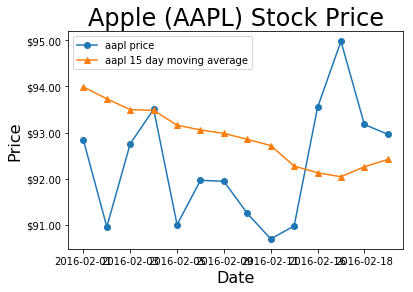

In [175]:
plot_price_no_gaps(
    'aapl', 
    title="Apple (AAPL) Stock Price",
    start=pd.Timestamp('2016-02-01'),
    end=pd.Timestamp('2016-02-20'),
    window_size=15,
    returns=False)

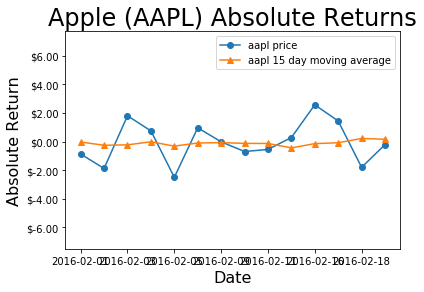

In [180]:
import warnings
warnings.filterwarnings("ignore")
plot_price_no_gaps(
    'aapl', 
    title="Apple (AAPL) Absolute Returns",
    start=pd.Timestamp('2016-02-01'),
    end=pd.Timestamp('2016-02-20'),
    window_size=15,
    abs_returns=True)

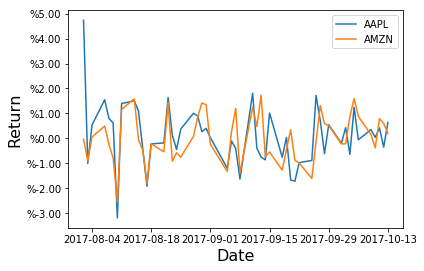

In [65]:
plot_price(
    'aapl', 'amzn',
    returns=True,
    start=pd.Timestamp('2017-08-01'),
    end=pd.Timestamp('2017-10-15'),
    title='')

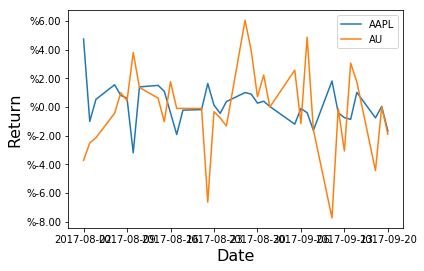

In [66]:
plot_price(
    'aapl', 'au',
    returns=True,
    start=pd.Timestamp('2017-08-01'),
    end=pd.Timestamp('2017-09-20'),
    title='')

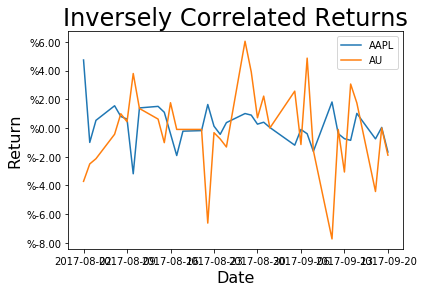

In [62]:
plot_price(
    'aapl', 'au',
    returns=True,
    start=pd.Timestamp('2017-08-01'),
    end=pd.Timestamp('2017-09-20'),
    title='Inversely Correlated Returns')

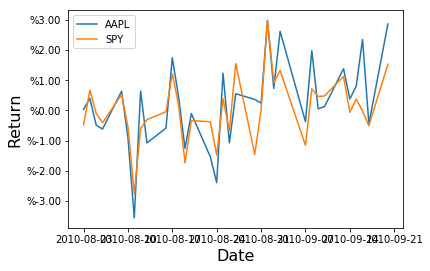

In [122]:
plot_price(
    'aapl', 'spy',
    returns=True,
    start=pd.Timestamp('2010-08-01'),
    end=pd.Timestamp('2010-09-20'))

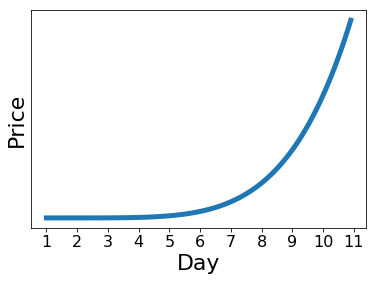

In [173]:
num_points =100
plt.plot(np.arange(num_points) ** 5.0, linewidth=5)

plt.xlabel('Day', fontsize=22)
plt.gca().set_xticks(range(0, num_points + 10, 10))
plt.gca().get_xaxis().set_major_formatter(
    matplotlib.ticker.FuncFormatter(lambda x, p: 1 + int(x / 10)))
plt.setp(plt.gca().get_xticklabels(), fontsize=16)

plt.ylabel('Price', fontsize=22)
plt.yticks([], [])

plt.savefig('price_momentum.svg')
plt.show()

# 1. Define Stategy Parameters

In [ ]:
LOOKBACK = 60
TRADING_DAYS_IN_YEAR = 252
MIN_DAYS_OF_HISTORY = 2 * TRADING_DAYS_IN_YEAR

# 2. Define Universe Construction Logic

In [ ]:
def symbols_with_top_n_volume(price_df, n):
    return price_df.sort_values('volume')[:n, 'volume'].sid.unique()


def compute_universe(date, yesterdays_universe):
    # Build set of symbols active on current date that have enough
    # history to consider.
    todays_prices = prices[date]
    active_symbols_today = set(todays_prices.sid.unique())
    
    # TODO: handle start being on a weekend
    start_of_required_history = date - pd.DateOffset(years=2)
    active_symbols_at_start_of_required_history = (
        prices[start_of_required_history].sid.unique())
    
    potenial_universe = (
        active_symbols_today &
        active_symbols_at_start_of_required_history)
    
    # Pick securities in potential universe with top N volume.
    sorted_by_vol = todays_prices.sort_values('volume')
    todays_universe = set(
        sorted_by_vol[sorted_by_vol.sid.isin(potenial_universe)]
        [:1000]
        .sid.unique())
        
    # Add symbols for yesterday's universe.
    if yesterdays_universe is not None:
        todays_universe |= yesterdays_universe
   
    # Remove symbols where the volume is too low.
    symbols_with_too_low_volume = set(sorted_by_vol[1500:].sid.unique())
    symbols_to_liquidate = todays_universe & symbols_with_too_low_volume
    todays_universe -= symbols_to_liquidate
    
    return todays_universe, symbols_to_liquidate

# Define Portfolio Structure

In [ ]:
class Portfolio:
    
    def __init__(self):
        self._sid_to_position = {}
        
    def buy(self, sid, amount):
        pass
    
    def sell(self, sid, amount):
        pass
    
    def liquidate(self, sid):
        pass
    
    def returns(self, prices);
        pass

# 4. Define One Step of Simulation

In [ ]:
def run_step(positions, date, yesterdays_universe):
    universe, symbols_to_liquidate = compute_universe(
        date, yesterdays_universe)
    
    symbols_to_liquidate

# 5. Run Simulation for all Targeted Historical Range

In [38]:
START_DATE = pd.Timestamp('2009-01-02')
END_DATE = pd.Timestamp('2017-11-10')

def is_business_day(date: pd.Timestamp) -> bool:
    weekday = date.to_datetime().weekday
    return weekday >= 0 and weekday <= 4

positions = {}
date_pnl = {}
today = START_DATE
yesterdays_universe = None

while today <= END_DATE:
    date[pnl] = {}
    run_step(positions, today, yesterdays_universe)
    
    # Advance to net business day.
    today += pd.DateOffset(days=1)
    while not is_business_day(current_date):
        today += pd.DateOffset(days=1)

NameError: name 'run_step' is not defined